## Predict without preprocessing

In [2]:
from utils import preprocess_procedure, make_prediction

config_wo_prep = {
    "model_name": "unet3d",
    "input_channel": 1,
    "output_channel": 1,
    "filter_number": 16,
    "input_path": "./data/img/",
    "output_path": "./saved_imgs/generated_label/",
    "thresh": 0.1,
    "connect_thresh": 10,
    "test_model_name": "./saved_models/manual_0429",
    "mip_flag": True
}

make_prediction(**config_wo_prep)

Running with CPU
Prediction procedure starts!


100%|██████████████████████████████████████████████████████████| 6/6 [02:03<00:00, 20.56s/it]


Prediction procedure ends! Please wait for the post processing!
Output processed GRE_400um.nii is successfully saved!

Output MIP image GRE_400um.nii is successfully saved!

Prediction and thresholding procedure end!



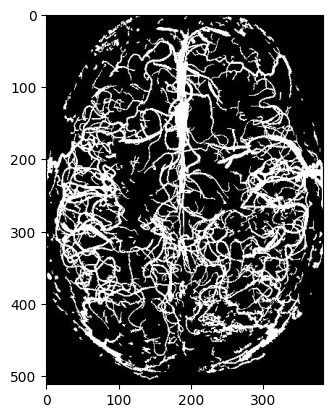

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as img

mip_image = img.imread("./saved_imgs/generated_label/GRE_400um.jpg")
plt.imshow(mip_image, cmap='gray')

## Predict with preprocessing

If you require preprocessing, there are three options:
 - Set prep_mode to 1 for N4 bias field correction only;
 - Set prep_mode to 2 for denoising only;
 - Set prep_mode to 3 for both. 

In [4]:
config_with_prep = {
    "model_name": "unet3d",
    "input_channel": 1,
    "output_channel": 1,
    "filter_number": 16,
    "input_path": "./data/img/",
    "output_path": "./saved_imgs/generated_label_2/",
    "thresh": 0.1,
    "connect_thresh": 10,
    "test_model_name": "./saved_models/manual_0429",
    "mip_flag": True
}

preprocess_procedure(ds_path="./data/img", ps_path="./data/preprocessed/", prep_mode=1)
make_prediction(**config_with_prep)

The preprocessing procedure is starting!



100%|██████████████████████████████████████████████████████████| 1/1 [00:33<00:00, 33.88s/it]


All processed images are successfully saved!
Running with CPU
Prediction procedure starts!


100%|██████████████████████████████████████████████████████████| 6/6 [02:05<00:00, 20.97s/it]


Prediction procedure ends! Please wait for the post processing!
Output processed GRE_400um.nii is successfully saved!

Output MIP image GRE_400um.nii is successfully saved!

Prediction and thresholding procedure end!



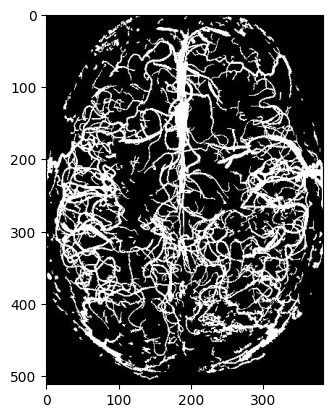

In [5]:
mip_image = img.imread("./saved_imgs/generated_label_2/GRE_400um.jpg")
plt.imshow(mip_image, cmap='gray')

## Evaluation

In [ ]:
from utils import eval_scores

# This function requires params as ndarray
# eval = eval_scores(segmentation_result, ground_truth)()